### This tutorial aims to demonstrate the capabities of the Baycomp package in assessing the results of machine learning analysis 
- Begin with importing the required packages to carry out statistical and machine learning analysis

In [1]:
import pandas as pd
import numpy as np
import os
import baycomp as bc
import matplotlib.pyplot as plt
import scipy.stats as scipy
#from scipy.stats import distribution
from scipy.stats import t as TDist
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import seaborn as sns

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV

- The first dataset we will look at is the Breast Cancer data
- This data can be downloaded at the following link: https://www.kaggle.com/datasets/nancyalaswad90/breast-cancer-dataset

In [2]:
os.chdir(r'C:\Users\35385\Documents\FYP\Solo_dataset')
brc = pd.read_csv('bc_data.csv')

- The following simple cleaning can be implemented to ensure the model runs smoothly

In [3]:
brc = brc.drop('id', axis = 1)
# 0's in concavity_mean and concave_points_mean
brc['concavity_mean'].replace(0, brc['concavity_mean'].mean(), inplace=True)
brc['concave_points_mean'].replace(0, brc['concave_points_mean'].mean(), inplace=True)
# Changing 'diagnosis' col 'm' to 1 and 'b' to 0
brc['diagnosis'].replace('M', 1, inplace=True)
brc['diagnosis'].replace('B', 0, inplace=True)

In [4]:
brc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
brc.shape[0]

569

- Plotting a simple histogram of the independent outcome variable is useful for intuitively determining the effectiveness and accuracy of the machine learning classifier.
- For example, we see below that the number of malignant cases (1) is approx 220. This represents approx 38% of the data.
- Therefore, our classifier accuracy should be higher than 62% (100%-38%), because without the classifier we would have that probability of choosing the correct diagnosis at random

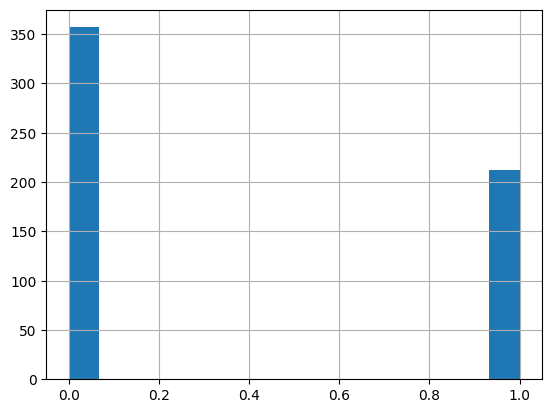

In [13]:
brc["diagnosis"].hist(bins=15)
plt.show()

In [6]:
corr_matrix = brc.corr()
>>> corr_matrix["diagnosis"]

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.686779
concave_points_mean        0.768837
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave_points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

- The data must be prepared for machine learning analysis by splitting it into training and test sets 

In [278]:
X = brc.drop('diagnosis', axis = 1)
X = X.values
y = brc['diagnosis']
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)

### k-Nearest-Neighbours Analysis (kNN)

- kNN is a non-parametric, supervised machine learning classifier 
- It is an approach to classification whereby new random data can be allocated to an appropriate group following observation of existing variables and their correlative relationship.
- The non-parametric approach of kNN minimizes the chance of misclassifying new data points to a high level of accuracy.
- Our class assignment is fixed in this case, with data points belonging to either 0 or 1, representing benign and malignant breat lumps respectively

In [281]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

RMSE on training data

In [282]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.0

RMSE on test data

In [283]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.1873171623163388

RMSE on train and test data with optimized k

In [284]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse
test_rmse

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `

0.18871681188415435

RMSE improved from 0.2809 to 0.2435 with optimized k. Sticking with this result 

RMSE = Root Mean Square Error

Accuracy assessed by confusion matrix (with the non-optimized results of kNN!!):

In [285]:
print(confusion_matrix(y_test, test_preds))
print('Accuracy ' + str(accuracy_score(y_test, test_preds)))

[[40  1]
 [ 1 15]]
Accuracy 0.9649122807017544


In [286]:
test_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

For the pupose of demonstrating baycomp I will not be using the results of kNN with the optimized k value as it not does produce binary predictions. We will stick with k = 1 and accuracy score of .8859 despite achieving better accuracy with another k (=11). 
This is because I will be using the accuracy score of the confusion matrix - as opposed to the Root Mean Squared Error. 

### Linear Disciminant Analysis (LDA)

- LDA is a parametric statistical method.
- Like Principle Components Analysis, it looks for linear combinations of data that best explain the group to which it belongs

In [287]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [288]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [289]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [300]:
classifier = RandomForestClassifier(max_depth=2, random_state=12345)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. 

In [301]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[39  2]
 [ 0 16]]
Accuracy 0.9649122807017544


In [302]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

0.1873171623163388

Getting RMSE of .1873 using LDA

In [303]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

## 10*10-fold Cross Validation on different classifiers

- This is an important step before using baycomp to assess the different classifiers
- K-fold Cross-Validation is when the dataset is split into a K number of folds and is used to evaluate the model's ability when given new data
- In this case, I split the dataset into 90/10 training and test data. Thus, 10% of the data will be used as a test set. 
- There are 10 distinct sets of 10% of the data. 
- I will test each of these 10 times, hence the name 10*10-fold. 
- This will produce 100 accuracy scores for each classifier on the data 

#### Running 10*10-fold cross validation for Random Forest Classifier

In [304]:
from sklearn.model_selection import cross_val_score

acc = []
for i in range(0,10):
    classifier = RandomForestClassifier(max_depth=2, random_state=12345)
    scores = cross_val_score(classifier, X, y, cv= 1)
    acc.append(scores)
    

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

In [305]:
acc = [arr.tolist() for arr in acc]
acc_list = [item for sublist in acc for item in sublist]

In [306]:
df = pd.DataFrame(acc_list)
df.columns = ['RF']
df

,RF
0,0.965517
1,0.862069
2,0.912281
3,0.964912
4,0.964912
...,...
95,0.964912
96,0.912281
97,0.982143
98,0.946429


#### Running 10*10-fold cross validation for kNN Classifier

In [307]:
from sklearn.neighbors import KNeighborsClassifier

In [308]:
acc = []
for i in range(0,10):
    classifier = KNeighborsClassifier(n_neighbors=1)
    scores = cross_val_score(classifier, X, y, cv= 10)
    acc.append(scores)
    

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

In [309]:
acc = [arr.tolist() for arr in acc]
acc_list = [item for sublist in acc for item in sublist]
df2 = pd.DataFrame(acc_list)
df2.columns = ['kNN']
df2

,kNN
0,0.931034
1,0.844828
2,0.929825
3,0.929825
4,0.912281
...,...
95,0.894737
96,0.929825
97,0.946429
98,0.892857


#### Running 10*10-fold cross validation for Multi-layer Perceptron classifier

In [310]:
from sklearn.neural_network import MLPClassifier

In [311]:
acc = []
for i in range(0,10):
    classifier = MLPClassifier()
    scores = cross_val_score(classifier, X, y, cv= 10)
    acc.append(scores)
    

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

In [312]:
acc = [arr.tolist() for arr in acc]
acc_list = [item for sublist in acc for item in sublist]
df3 = pd.DataFrame(acc_list)
df3.columns = ['MLP']
df3

,MLP
0,0.931034
1,0.913793
2,0.894737
3,0.947368
4,0.947368
...,...
95,0.912281
96,0.947368
97,0.928571
98,0.928571


- The following code amalgamates the 3 sets of accuracy results into one table
- Letting classifiers be denoted by RF Random Forest, MLP for Multi-Layer Perceptron, and kNN for k-Nearest-Neighbours

In [313]:
frames = [df, df2, df3]
results = pd.concat(frames, axis = 1)
results = results.T
for i in range(0, 100):
    results = results.rename(columns = {i : 'Run ' + str(i+1)})

results

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,...,Run 91,Run 92,Run 93,Run 94,Run 95,Run 96,Run 97,Run 98,Run 99,Run 100
RF,0.965517,0.862069,0.912281,0.964912,0.964912,0.964912,0.912281,0.982143,0.946429,0.982143,...,0.965517,0.862069,0.912281,0.964912,0.964912,0.964912,0.912281,0.982143,0.946429,0.982143
kNN,0.931034,0.844828,0.929825,0.929825,0.912281,0.894737,0.929825,0.946429,0.892857,0.946429,...,0.931034,0.844828,0.929825,0.929825,0.912281,0.894737,0.929825,0.946429,0.892857,0.946429
MLP,0.931034,0.913793,0.894737,0.947368,0.947368,0.929825,0.929825,0.928571,0.928571,0.982143,...,0.931034,0.931034,0.929825,0.964912,0.947368,0.912281,0.947368,0.928571,0.928571,0.964286


- The following few lines gives us the mean accuracy score of each classifier following the 10*10-fold cross validation

In [314]:
meanRF = np.mean(results.loc['RF'].values)
meanRF

0.9457598738224873

In [315]:
meankNN = np.mean(results.loc['kNN'].values)
meankNN

0.9158067582749978

In [316]:
meanMLP = np.mean(results.loc['MLP'].values)
meanMLP

0.9363824431769078

## Beginning Baycomp Analysis of superior classifiers

#### two_on_single

- Rather intuitively, the two_on_single function uses Bayesian Correlated T-tests to evaluate the accuracy of two different classifiers on one dataset by computing the posterior
- The posterior describes the distribution of the mean difference of accuracies between the two classifiers.
- In this analysis, our hypothesis is that one classifier outperforms another, and assess the probability of that happening -> e.g. P(RF>kNN)
- Querying the posterior distribution allows us to find this probability. 
- In addition, we will use a ROPE value, the Region of Practical Equivalence. This is the difference in accuracies between the two classifiers that is statistically insignificant. Therefore, we can conclude the classifiers are equivalent in practice. This region is depicted by the two vertical lines. 


#### two_on_single: Usage Guide
- Call two_on_single function using Baycomp alias bc
- The first two arguments are the accuracy values of 
- - 1. The first classifier 
- - 2. The second classifier
- Runs argument is required and should be expressed as an integer value of the number of runs of the classifier on the dataset being examined. In this case we did a 10*10-fold cross validation, so runs = 10.
- ROPE, or Region of Practical Equivalence as explained above, should be expressed as a percentage/ fraction and represents the max difference in accuracy for which the classifiers would be deemed equivalent.
- Setting plot = True will produce the plot of the posterior distribution 
- The names argument labels the accuracies of each classifier in the plot. They should be entered in the same chronological order as the first two arguments. 


Random forest vs kNN

(0.9802397945738767, 0.019728425390613147, 3.1780035510187155e-05)


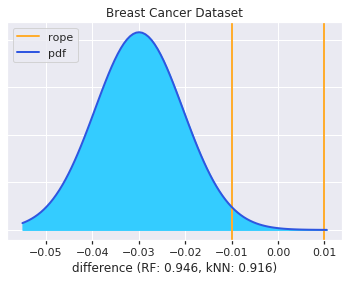

In [486]:
probs, fig = bc.two_on_single(results.loc['RF'].values, results.loc['kNN'].values, runs=10,
                              rope=1/100, plot=True, names=['RF','kNN'])
plt.title('Breast Cancer Dataset')
print(probs)

Random forest vs Multi-Layer Perceptron

(0.480496026976961, 0.4544220037294655, 0.06508196929357357)


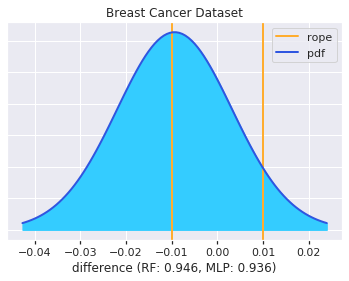

In [490]:
probs, fig = bc.two_on_single(results.loc['RF'].values, results.loc['MLP'].values,runs=10,
                              rope=1/100, plot=True, names=['RF','MLP'])
plt.title('Breast Cancer Dataset')
print(probs)

#### Interpretation of two_on_single

- The dark blue line represents the posterior distribution in the difference in accuracies between the two classifiers. 
- Rope value is set at 1/100 (1%), a widely acceptable upper-bound parameter for practical equivalence.
- We can find the probability that classifier 1 is superior to classifier 2 by finding the itegral of the posterior in the range [-inf, -0.01]. 
- Likewise the probability classifier 2 is superior to classifier 1 is the integral of the posterior in the range [0.01, inf]. 
- The probability that the two are equivalent is the integral of the posterior in the range [-0.01, 0.01]. 
- The probabilities are displayed by using function print(probs). 
- We can visualize these probabilities using the following function:

(0.480496026976961, 0.4544220037294655, 0.06508196929357357)


([<matplotlib.patches.Wedge at 0x2658b8b5ac8>,
 [Text(0.06735875169428308, 1.0979356987411366, 'P(RF>MLP)'),
  Text(-0.2888800178173702, -1.0613898130780397, 'P(RF = MLP)'),
  Text(1.0770875926792305, -0.2233434970991099, 'P(RF<MLP)')],
 [Text(0.036741137287790764, 0.5988740174951653, '48.0%'),
  Text(-0.15757091880947463, -0.5789398980425671, '45.4%'),
  Text(0.5875023232795802, -0.12182372569042356, '6.5%')])

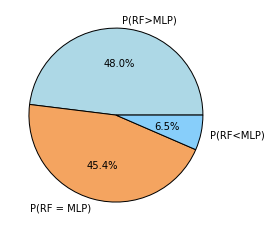

In [345]:
print(probs)
colours = ['lightblue', 'sandybrown', 'lightskyblue']
labels = ['P(RF>MLP)', 'P(RF = MLP)', 'P(RF<MLP)']
plt.pie(probs, colors = colours, labels = labels, autopct='%1.1f%%', shadow= False, 
       wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True, 'edgecolor': 'k'})

#### two_on_single is a shortcut function of the CorrelatedTTest function:

Random forest vs kNN

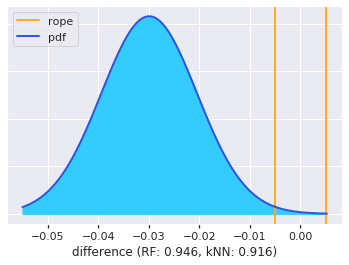

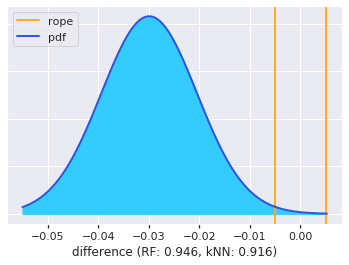

In [178]:
bc.CorrelatedTTest.plot(results.loc['RF'].values, results.loc['kNN'].values, runs=10, rope=1/200, names=['RF','kNN'])

Random forest vs Multi-Layer Perceptron

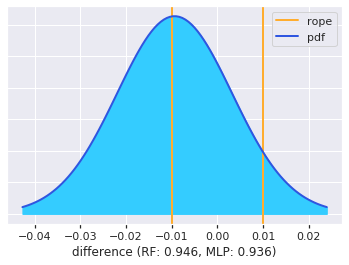

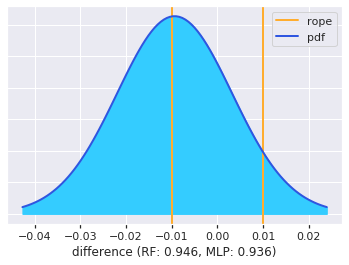

In [491]:
bc.CorrelatedTTest.plot(results.loc['RF'].values, results.loc['MLP'].values, 
                        runs=10, rope=1/100, names=['RF','MLP'])

#### The CorrelatedTTest function has other class methods:

compute_statistics returns the mean, variance and degrees of freedom respectively.
- An improvement I would like to see here is labeling on the output 

In [338]:
bc.CorrelatedTTest.compute_statistics(results.loc['RF'].values, results.loc['MLP'].values, runs=10)

(-0.009377430645579455, 0.00016121467249118442, 99)

- Above we see:
-- Mean accuracy difference = -0.00938
-- Variance = 0.00016
-- Degrees of freedom = 99 (n-1)

probs returns the probability that arg1 classifier outperforms arg2 classifier, the probability that they are practically equivalent, and the probability that arg2 classifier outperforms arg1 classifier respectively.
- An improvement I would like to see here is labeling on the output 

In [346]:
bc.CorrelatedTTest.probs(results.loc['RF'].values, results.loc['MLP'].values, runs=10, rope=1/100)

(0.480496026976961, 0.4544220037294655, 0.06508196929357357)

#### Signed Rank Test

Random forest vs kNN

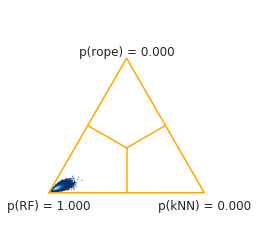

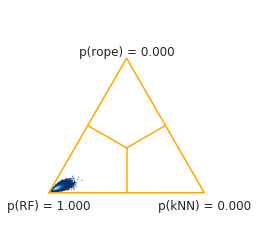

In [184]:
bc.SignedRankTest.plot(results.loc['RF'].values, results.loc['kNN'].values, rope=1/200, names=['RF','kNN'])

Random forest vs Multi-Layer Perceptron

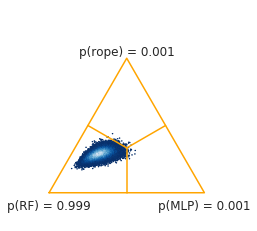

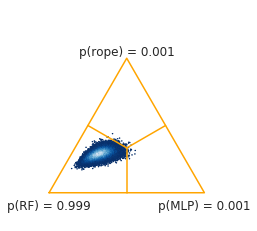

In [213]:
bc.SignedRankTest.plot(results.loc['RF'].values, results.loc['MLP'].values, rope=1/100, names=['RF','MLP'])

#### Posterior probabilities

- Posterior probabilities give the probability that one classifier is better than another on one dataset. 
- It is the integral of the posterior distribution from zero to infinity
- It is the probability that the mean difference in accuracies between 2 classifiers is greater than zero 

Random forest vs kNN

Breast Cancer Dataset (1.0, 0.0, 0.0)


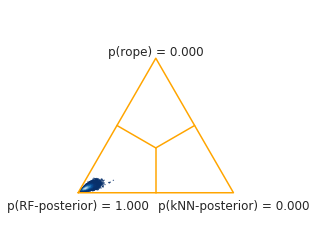

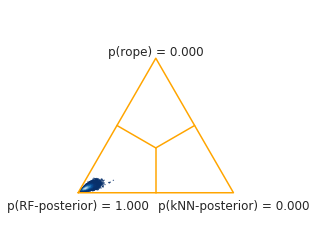

In [222]:
posterior = bc.SignedRankTest(results.loc['RF'].values, results.loc['kNN'].values, rope=1/100)
print('Breast Cancer Dataset', posterior.probs())
posterior.plot(names=("RF-posterior", "kNN-posterior"))

Random forest vs Multi-Layer Perceptron

Breast Cancer Dataset (0.99846, 0.00098, 0.00056)


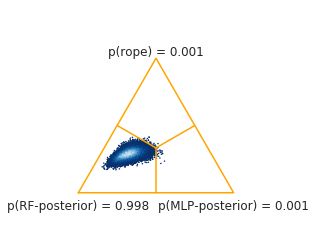

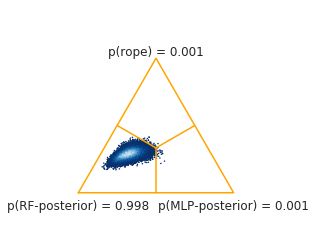

In [216]:
posterior = bc.SignedRankTest(results.loc['RF'].values, results.loc['MLP'].values, rope=1/100)
print('Breast Cancer Dataset', posterior.probs())
posterior.plot(names=("RF-posterior", "MLP-posterior"))

Interpretation:

- Region of practical equivalence (ROPE) is 0.01 (1%)
- This means that if the difference in accuracies between the two classifiers is less than 1%, the classifiers are practically equivalent. 
- From these results, we see the probability Random Forest outperforms Multi-Layer Perceptron on this data is 99.8%
- Formally, P(RF>MLP) = 0.998
- Therefore, P(RF<MLP) = 1 - P(RF>MLP) - P(Practically Equivalent) = 0.001

### Loading more datasets 

#### note: new notebook for two_on_mltiple

- With a second dataset we will be able to carry out the two_on_multiple analysis
- This function compares the accuracy of two different classifiers on different types of data
- The second dataset I will load is the iris data 

Datasets loaded below:
    - iris 
    - wine
    - zoo 
    - yeast 
    - mushroom 
    - Hepatitis 
    - Optdigits
    - Lymphography
    - sonar
    - pendigits

In [462]:
from sklearn import datasets
iris = datasets.load_iris()

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

In [463]:
target = pd.DataFrame(iris['target'])
data = pd.DataFrame(iris['data'])
target.columns = ['targets']
data.columns= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
frames = [target, data]
irisdf = pd.concat(frames, axis = 1)
iris = irisdf
iris

,targets,sepal_length,sepal_width,petal_length,petal_width
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3
146,2,6.3,2.5,5.0,1.9
147,2,6.5,3.0,5.2,2.0
148,2,6.2,3.4,5.4,2.3


- Another dataset is the wine data

In [464]:
wine = datasets.load_wine()
wine

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [465]:
target = pd.DataFrame(wine['target'])
data = pd.DataFrame(wine['data'])
target.columns = ['targets']
frames = [target, data]
winedf = pd.concat(frames, axis = 1)
wine = winedf
wine

,targets,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [372]:
X = iris.drop('targets', axis = 1)
X = X.values
y = iris['targets']
y = y.values

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)

In [378]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9333333333333333

In [259]:
acc = []
for i in range(0,10):
    classifier = MLPClassifier()
    scores = cross_val_score(classifier, X, y, cv= 10)
    acc.append(scores)

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

In [260]:
acc = [arr.tolist() for arr in acc]
acc_list = [item for sublist in acc for item in sublist]
dfI1 = pd.DataFrame(acc_list)
dfI1.columns = ['MLP']
dfI1

,MLP
0,1.000000
1,1.000000
2,1.000000
3,0.933333
4,0.866667
...,...
95,1.000000
96,0.866667
97,1.000000
98,1.000000


In [262]:
acc = []
for i in range(0,10):
    classifier = KNeighborsClassifier(n_neighbors=1)
    scores = cross_val_score(classifier, X, y, cv= 10)
    acc.append(scores)

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

In [263]:
acc = [arr.tolist() for arr in acc]
acc_list = [item for sublist in acc for item in sublist]
dfI2 = pd.DataFrame(acc_list)
dfI2.columns = ['kNN']
dfI2

,kNN
0,1.000000
1,0.933333
2,1.000000
3,0.933333
4,0.866667
...,...
95,1.000000
96,0.866667
97,1.000000
98,1.000000


In [264]:
acc = []
for i in range(0,10):
    classifier = RandomForestClassifier(max_depth=2, random_state=12345)
    scores = cross_val_score(classifier, X, y, cv= 10)
    acc.append(scores)

C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\35385\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

In [265]:
acc = [arr.tolist() for arr in acc]
acc_list = [item for sublist in acc for item in sublist]
dfI3 = pd.DataFrame(acc_list)
dfI3.columns = ['RF']
dfI3

,RF
0,1.000000
1,0.933333
2,1.000000
3,0.933333
4,0.933333
...,...
95,0.933333
96,0.866667
97,1.000000
98,1.000000


In [266]:
frames = [dfI1, dfI2, dfI3]
results = pd.concat(frames, axis = 1)
results = results.T
for i in range(0, 100):
    results = results.rename(columns = {i : 'Run ' + str(i+1)})

results

,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,Run 10,...,Run 91,Run 92,Run 93,Run 94,Run 95,Run 96,Run 97,Run 98,Run 99,Run 100
MLP,1.0,1.000000,1.0,0.933333,0.866667,1.000000,0.866667,1.0,1.0,1.0,...,1.0,1.000000,1.0,0.933333,0.866667,1.000000,0.866667,1.0,1.0,1.0
kNN,1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,1.0,1.0,1.0,...,1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,1.0,1.0,1.0
RF,1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.866667,1.0,1.0,1.0,...,1.0,0.933333,1.0,0.933333,0.933333,0.933333,0.866667,1.0,1.0,1.0


In [268]:
meanRF = np.mean(results.loc['RF'].values)
meanRF

0.96

In [269]:
meanMLP = np.mean(results.loc['MLP'].values)
meanMLP

0.9739999999999999

In [362]:
meankNN = np.mean(results.loc['kNN'].values)
meankNN

0.9158067582749978

Loading zoo data 

In [466]:
zoo = pd.read_csv('zoo.csv')
zoo = zoo.drop('animal_name', axis = 1)
zoo.rename(columns={'class_type': 'targets'}, inplace = True)
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,targets
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


Loading yeast data 

In [467]:
yeast = pd.read_csv('yeast.csv')
# Setting class to 'name' classification
yeast['name'].replace('CYT', 1, inplace=True)
yeast['name'].replace('NUC', 2, inplace=True)
yeast['name'] = np.where((yeast['name'] != 1) & (yeast['name'] != 2), 3, yeast['name'])
yeast.rename(columns={'name': 'targets'}, inplace = True)
yeast

,mcg,gvh,alm,mit,erl,pox,vac,nuc,targets
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,3
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,3
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,3
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,2
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,3
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,3
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,2
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,3
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,2


Loading Mushroom Data

In [468]:
mush = pd.read_csv('mushrooms.csv')
mush['class'].replace('p', 1, inplace=True)
mush['class'].replace('e', 0, inplace=True)
mush.rename(columns={'class': 'targets'}, inplace = True)
mush

,targets,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Hepatitis

In [469]:
hep = pd.read_csv('hepatitis.csv')
hep.rename(columns={'class': 'targets'}, inplace = True)
hep

,targets,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,1,46,1,2,2,1,1,1,2,1,2,1,1,1,7.6,105,242,3.3,50,2
138,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126,142,4.3,61,2
139,2,61,1,1,2,1,1,2,1,2,2,1,2,2,0.8,75,20,4.1,61,2
140,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


Lymphography

****** REQUIRES MORE CLEANING 

In [470]:
lym = pd.read_csv('lymph_csv.csv')
lym['class'].unique()
lym['class'].replace('malign_lymph', 1, inplace=True)
lym['class'].replace('fibrosis', 2, inplace=True)
lym['class'].replace('metastases', 3, inplace=True)
lym['class'].replace('normal', 4, inplace=True)
lym.rename(columns={'class': 'targets'}, inplace = True)
lym

,lymphatics,block_of_affere,bl_of_lymph_c,bl_of_lymph_s,by_pass,extravasates,regeneration_of,early_uptake_in,lym_nodes_dimin,lym_nodes_enlar,changes_in_lym,defect_in_node,changes_in_node,changes_in_stru,special_forms,dislocation_of,exclusion_of_no,no_of_nodes_in,targets
0,arched,yes,no,no,no,no,no,yes,1,4,round,lac_central,lacunar,stripped,vesicles,yes,yes,5,1
1,displaced,yes,no,no,yes,yes,no,yes,1,3,round,lac_central,lacunar,diluted,vesicles,yes,yes,3,1
2,deformed,no,no,no,yes,yes,yes,no,3,1,bean,lacunar,no,diluted,vesicles,no,no,7,2
3,arched,no,no,no,no,yes,no,yes,1,2,oval,lac_margin,lac_margin,drop_like,vesicles,no,yes,1,1
4,arched,no,no,no,no,no,no,no,1,2,round,lac_margin,lac_margin,faint,vesicles,no,no,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,displaced,no,no,no,no,no,no,yes,1,3,round,lacunar,lacunar,coarse,chalices,yes,yes,2,3
144,deformed,no,no,no,no,yes,no,yes,1,4,round,lac_central,lacunar,coarse,vesicles,yes,yes,6,1
145,deformed,yes,no,no,yes,yes,no,yes,1,2,oval,lac_central,lac_margin,diluted,chalices,yes,yes,4,1
146,deformed,yes,no,no,no,no,no,yes,1,3,oval,lacunar,lac_central,faint,vesicles,yes,yes,3,1


Optdigits dataset

In [471]:
opt = pd.read_csv('optdigits_csv.csv')
opt.rename(columns={'class': 'targets'}, inplace = True)
opt

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,targets
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
5616,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
5617,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
5618,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


Sonar dataset 

In [472]:
sonar = pd.read_csv('sonar_csv.csv')
sonar['Class'].unique()
sonar['Class'].replace('Rock', 1, inplace=True)
sonar['Class'].replace('Mine', 2, inplace=True)
sonar.rename(columns={'Class': 'targets'}, inplace = True)
sonar

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,targets
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,2
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,2
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,2
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,2


Pendigits dataset 

In [473]:
pend = pd.read_csv('pendigits_csv.csv')
pend.rename(columns={'class': 'targets'}, inplace = True)
pend

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,targets
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4
10988,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2
10989,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0
10990,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0


In [483]:
d = {'datasets': ['iris', 'wine', 'zoo', 'yeast', 'mush', 'hep', 'opt', 'lym', 'sonar',
              'pend']}
df = pd.DataFrame(data=d)
df

,datasets
0,iris
1,wine
2,zoo
3,yeast
4,mush
5,hep
6,opt
7,lym
8,sonar
9,pend


In [485]:
for i in df['datasets']:
    X = i.drop('targets', axis = 1)
    #X = X.values
    #y = i['targets']
    #y = y.values
    print(i)
    

AttributeError: 'str' object has no attribute 'drop'